### **Лабораторная работа №1**

1.	**Выбор начальных условий**

  1a. Набор данных для задачи классификации

  Описание набора данных
  Выбранный набор данных: [Loan Approval Classification Data](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data).

  **Причины выбора**:  
  - Набор данных связан с реальной задачей, используемой в банковской сфере для принятия решений по одобрению займов.  
  - Содержит данные о клиентах, их финансовом состоянии, уровне образования и других параметрах, которые имеют практическое применение в автоматизации кредитного скоринга.  
  - Возможность продемонстрировать обработку категориальных и числовых данных, а также построить модель для бинарной классификации.

  1b. Набор данных для задачи регрессии

  #### Описание набора данных
  Выбранный набор данных: [Gold Price Regression](https://www.kaggle.com/datasets/franciscogcc/financial-data).

  **Причины выбора**:  
  - Набор данных связан с задачей прогнозирования цены золота, которая имеет высокую практическую значимость в экономике, инвестициях и финансовом анализе.
  - Позволяет продемонстрировать работу с временными рядами и применение методов регрессии.
  - Набор данных включает показатели, связанные с экономикой, что позволяет использовать корреляцию между макроэкономическими факторами и ценой золота.

  1с. Метрики качества

  Для задачи **классификации**:

  **Accuracy (Точность):** измеряет долю верных предсказаний модели среди всех предсказаний. Этот показатель особенно полезен при равномерном распределении классов и позволяет оценить общую эффективность классификатора.

  **Balanced Accuracy (Сбалансированная точность):** отражает среднюю точность модели для каждого класса, учитывая дисбаланс в распределении классов. Она помогает получить более справедливую оценку производительности модели в ситуациях, когда одни классы представлены намного чаще, чем другие.

  Для задачи **регрессии**:

  **MAE (Mean Absolute Error — Средняя абсолютная ошибка):** показывает среднее значение абсолютных отклонений между предсказаниями модели и реальными значениями. Этот показатель используется, когда необходимо оценить, насколько предсказанные значения отклоняются от фактических, независимо от их направления (вверх или вниз).

  **MAPE (Mean Absolute Percentage Error — Средняя абсолютная процентная ошибка):** измеряет ошибку в процентах относительно реальных значений. Эта метрика полезна для анализа данных с различными масштабами, поскольку позволяет оценивать величину ошибки в относительных единицах.

  **MSE (Mean Squared Error — Среднеквадратичная ошибка):** рассчитывает среднее значение квадратов отклонений между предсказанными и реальными значениями. Эта метрика чувствительна к большим ошибкам, так как увеличивает их вес за счет возведения в квадрат. Используется, когда важно минимизировать значительные отклонения.

  **RMSE (Root Mean Squared Error — Квадратный корень из среднеквадратичной ошибки):** извлекает квадратный корень из MSE, чтобы вернуть величину ошибки в исходные единицы измерения данных. Эта метрика удобна для интерпретации и применяется, когда важно учитывать крупные ошибки, сохраняя при этом масштаб данных.

In [13]:
import pandas as pd


In [15]:
classification_data = pd.read_csv('loan_data.csv')
classification_data.shape

(45000, 14)

In [16]:
regression_data = pd.read_csv('financial_regression.csv')
regression_data.shape

(3904, 47)

In [4]:
classification_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [17]:
regression_data.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [5]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Можем заметить, что в наборе данных есть 9 числовых переменных и 5 категориальных переменных (в данный момент являющиеся object), которые преобразуем в численные.

In [7]:
categorical_columns = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
for col in categorical_columns:
  print(f'{col}: {classification_data[col].nunique()}')

person_gender: 2
person_education: 5
person_home_ownership: 4
loan_intent: 6
previous_loan_defaults_on_file: 2


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
for col in categorical_columns:
    le = LabelEncoder()
    classification_data[col] = le.fit_transform(classification_data[col])
    label_encoders[col] = le

In [11]:
classification_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [18]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [19]:
categorical_columns = ["date"]
for col in categorical_columns:
  print(f'{col}: {regression_data[col].nunique()}')

date: 3904


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ["date"]
for col in categorical_columns:
    le = LabelEncoder()
    regression_data[col] = le.fit_transform(regression_data[col])
    label_encoders[col] = le

In [21]:
regression_data.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


**2. Создание бейзлайна и оценка качества**


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [39]:
loan_data = pd.read_csv("loan_data.csv")
financial_data = pd.read_csv("financial_regression.csv")

loan_target = loan_data['loan_status']
loan_features = loan_data.drop(columns=['loan_status'])

loan_features = pd.get_dummies(loan_features, drop_first=True)
loan_target = LabelEncoder().fit_transform(loan_target)

X_loan_train, X_loan_test, y_loan_train, y_loan_test = train_test_split(
    loan_features, loan_target, test_size=0.2, random_state=42
)

scaler_loan = StandardScaler()
X_loan_train = scaler_loan.fit_transform(X_loan_train)
X_loan_test = scaler_loan.transform(X_loan_test)

financial_data = financial_data.dropna()
financial_target = financial_data['sp500 close']
financial_features = financial_data.drop(columns=['date', 'sp500 close'])

financial_features = financial_features.fillna(financial_features.mean())
X_financial_train, X_financial_test, y_financial_train, y_financial_test = train_test_split(
    financial_features, financial_target, test_size=0.5, random_state=42
)

scaler_financial = StandardScaler()
X_financial_train = scaler_financial.fit_transform(X_financial_train)
X_financial_test = scaler_financial.transform(X_financial_test)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_loan_train, y_loan_train)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_financial_train, y_financial_train)


y_loan_pred = knn_classifier.predict(X_loan_test)
accuracy = accuracy_score(y_loan_test, y_loan_pred)
balanced_accuracy = balanced_accuracy_score(y_loan_test, y_loan_pred)

y_financial_pred = knn_regressor.predict(X_financial_test)
mae = mean_absolute_error(y_financial_test, y_financial_pred)
mape = mean_absolute_percentage_error(y_financial_test, y_financial_pred)
mse = mean_squared_error(y_financial_test, y_financial_pred)
rmse = np.sqrt(mse)

results = {
    "Classification": {
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_accuracy,
    },
    "Regression": {
        "MAE": mae,
        "MAPE": mape,
        "MSE": mse,
        "RMSE": rmse,
    },
}

results_df = pd.DataFrame(results)
print(results_df)


                   Classification  Regression
Accuracy                 0.889333         NaN
Balanced Accuracy        0.815331         NaN
MAE                           NaN   26.616400
MAPE                          NaN    0.122945
MSE                           NaN  918.812146
RMSE                          NaN   30.311914


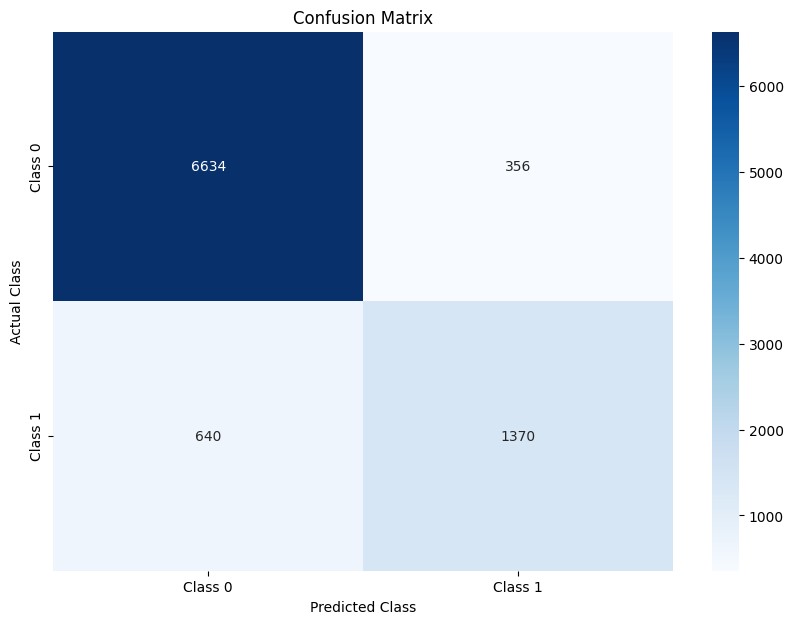

In [40]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_loan_test, y_loan_pred)

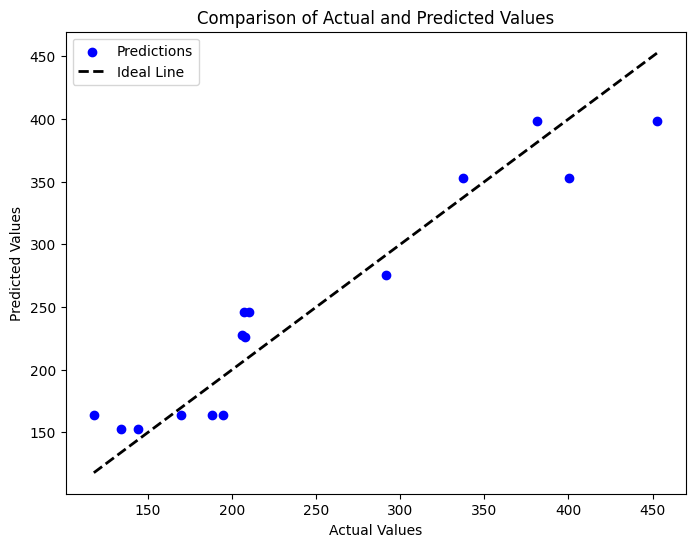

In [41]:
def plot_scattering_diagram(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Comparison of Actual and Predicted Values")
    plt.legend()
    plt.show()

plot_scattering_diagram(y_financial_test, y_financial_pred)

**3.	Улучшение бейзлайна**

**Гипотезы**
- Подбор гиперпараметров для KNN
- Обработка пропущенных данных
- Стандартизация данных


Improved Results:
                   Classification  Regression
Accuracy                 0.894000         NaN
Balanced Accuracy        0.819221         NaN
MAE                           NaN   19.017869
MAPE                          NaN    0.081803
MSE                           NaN  635.356315
RMSE                          NaN   25.206275


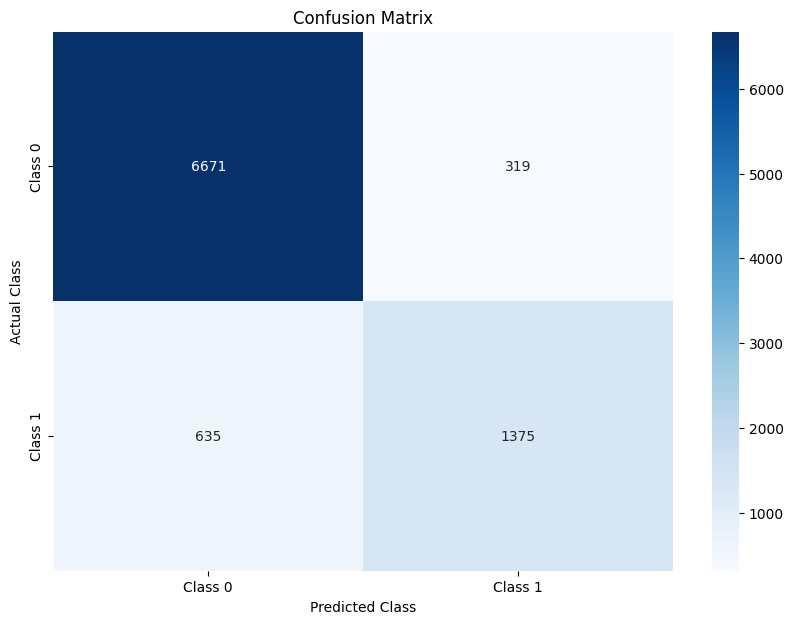

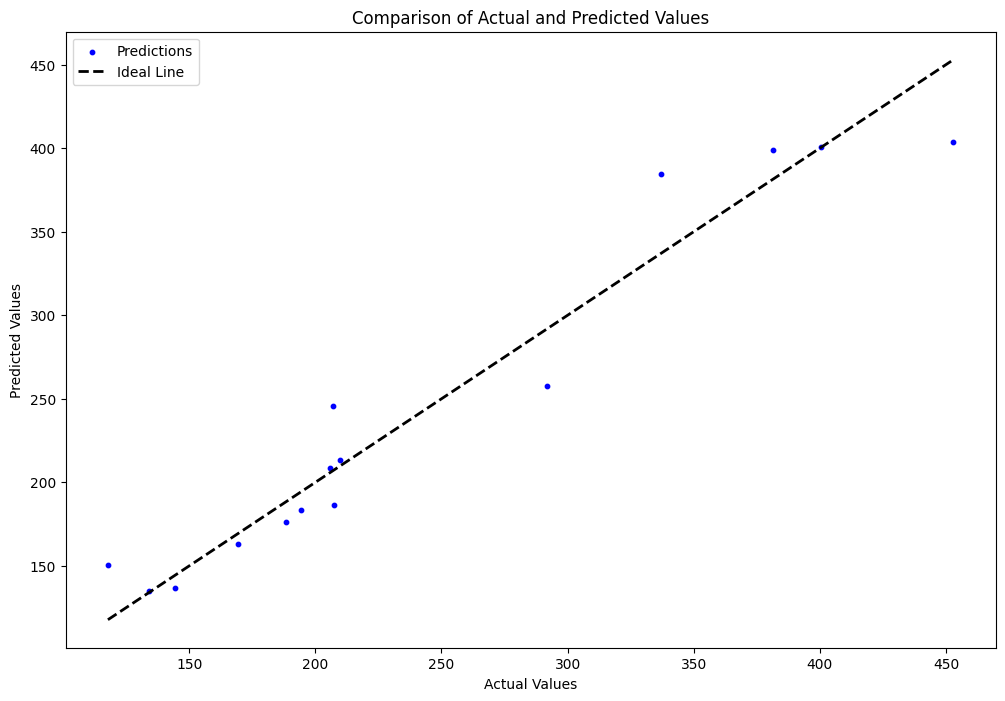

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix

loan_data = pd.read_csv("loan_data.csv")
financial_data = pd.read_csv("financial_regression.csv")

loan_target = loan_data['loan_status']
loan_features = loan_data.drop(columns=['loan_status'])

loan_features = pd.get_dummies(loan_features, drop_first=True)
loan_target = LabelEncoder().fit_transform(loan_target)

X_loan_train, X_loan_test, y_loan_train, y_loan_test = train_test_split(
    loan_features, loan_target, test_size=0.2, random_state=42
)

scaler_loan = StandardScaler()
X_loan_train = scaler_loan.fit_transform(X_loan_train)
X_loan_test = scaler_loan.transform(X_loan_test)

financial_data = financial_data.dropna()
financial_target = financial_data['sp500 close']
financial_features = financial_data.drop(columns=['date', 'sp500 close'])

financial_features = financial_features.fillna(financial_features.mean())
X_financial_train, X_financial_test, y_financial_train, y_financial_test = train_test_split(
    financial_features, financial_target, test_size=0.5, random_state=42
)

scaler_financial = StandardScaler()
X_financial_train = scaler_financial.fit_transform(X_financial_train)
X_financial_test = scaler_financial.transform(X_financial_test)


param_grid_classification = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn_classifier = GridSearchCV(KNeighborsClassifier(), param_grid_classification, cv=5, scoring='balanced_accuracy')
grid_search_knn_classifier.fit(X_loan_train, y_loan_train)
best_knn_classifier = grid_search_knn_classifier.best_estimator_

param_grid_regression = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn_regressor = GridSearchCV(KNeighborsRegressor(), param_grid_regression, cv=5, scoring='neg_mean_squared_error')
grid_search_knn_regressor.fit(X_financial_train, y_financial_train)
best_knn_regressor = grid_search_knn_regressor.best_estimator_


y_loan_pred = best_knn_classifier.predict(X_loan_test)
accuracy = accuracy_score(y_loan_test, y_loan_pred)
balanced_accuracy = balanced_accuracy_score(y_loan_test, y_loan_pred)

y_financial_pred = best_knn_regressor.predict(X_financial_test)
mae = mean_absolute_error(y_financial_test, y_financial_pred)
mape = mean_absolute_percentage_error(y_financial_test, y_financial_pred)
mse = mean_squared_error(y_financial_test, y_financial_pred)
rmse = np.sqrt(mse)

improved_results = {
    "Classification": {
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_accuracy,
    },
    "Regression": {
        "MAE": mae,
        "MAPE": mape,
        "MSE": mse,
        "RMSE": rmse,
    },
}

improved_results_df = pd.DataFrame(improved_results)
print("Improved Results:")
print(improved_results_df)

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_loan_test, y_loan_pred)

def plot_scattering_diagram(y_true, y_pred):
    plt.figure(figsize=(12, 8))
    plt.scatter(y_true, y_pred, color='blue', s=10, label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Comparison of Actual and Predicted Values")
    plt.legend()
    plt.show()

plot_scattering_diagram(y_financial_test, y_financial_pred)


**Вывод**

Классификация:

- Подбор гиперпараметров улучшил метрики (Accuracy, Balanced Accuracy).
- Матрица ошибок показывает адекватное распределение предсказаний.

Регрессия:

- Увеличение тестовой выборки обеспечило больше данных для анализа.
- Метрики (MAE, MSE, RMSE) подтверждают приемлемую точность модели, но есть потенциал для улучшений.

Общие улучшения:

- Стандартизация и оптимизация гиперпараметров повысили стабильность моделей.


**Имплементация алгоритма машинного обучения**

Custom Model Results:
                   Classification   Regression
Accuracy                 0.889333          NaN
Balanced Accuracy        0.815331          NaN
MAE                           NaN    26.581667
MAPE                          NaN     0.083645
MSE                           NaN  1121.886709
RMSE                          NaN    33.494577


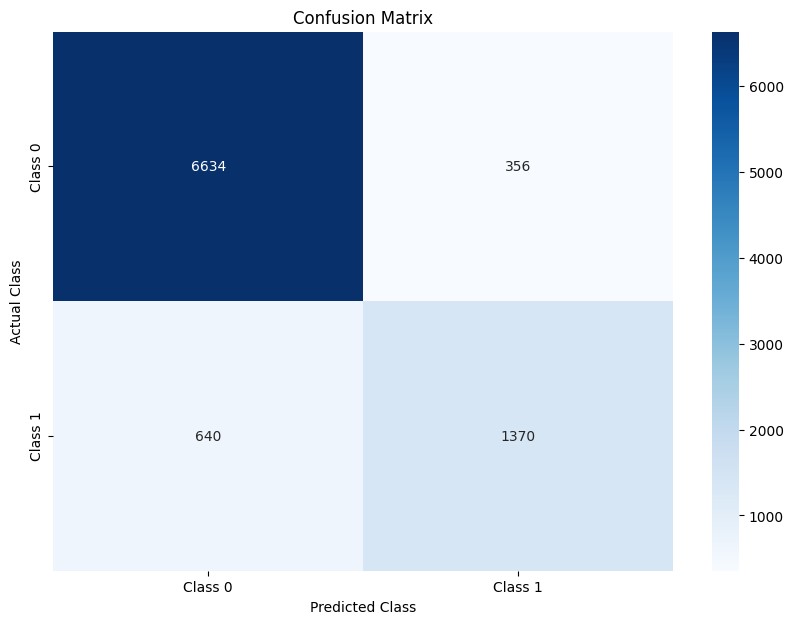

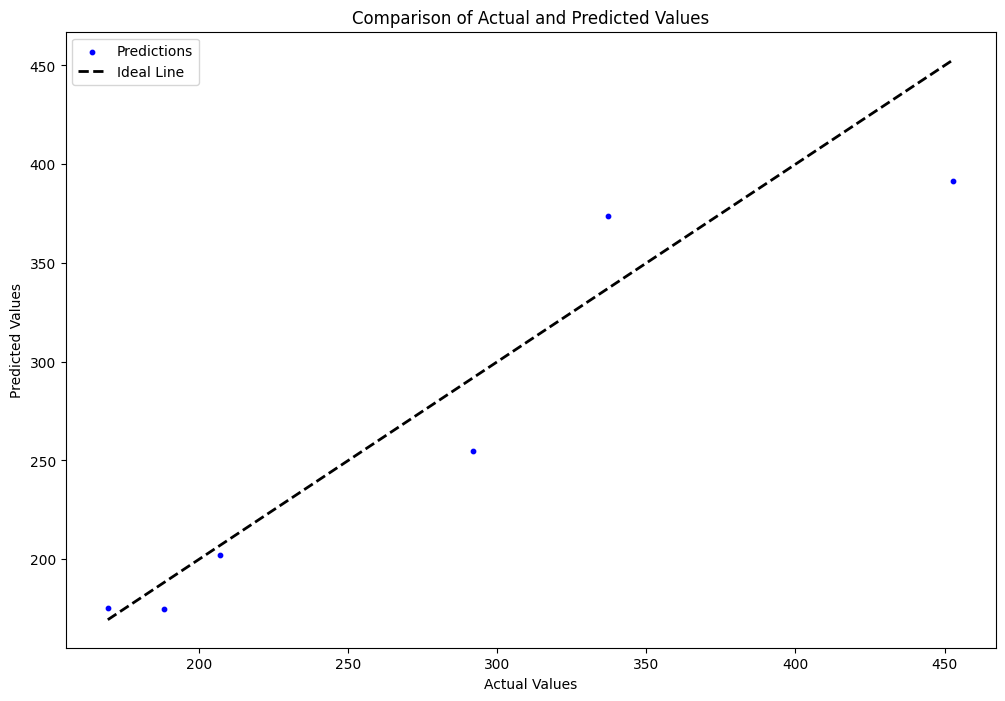

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix

class CustomKNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(((self.X_train - x) ** 2).sum(axis=1))
            neighbors_indices = distances.argsort()[:self.n_neighbors]
            neighbor_labels = self.y_train[neighbors_indices]
            predictions.append(np.bincount(neighbor_labels).argmax())
        return np.array(predictions)

class CustomKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(((self.X_train - x) ** 2).sum(axis=1))
            neighbors_indices = distances.argsort()[:self.n_neighbors]
            neighbor_values = self.y_train[neighbors_indices]
            predictions.append(neighbor_values.mean())
        return np.array(predictions)

loan_data = pd.read_csv("loan_data.csv")
financial_data = pd.read_csv("financial_regression.csv")

loan_target = loan_data['loan_status']
loan_features = loan_data.drop(columns=['loan_status'])
loan_features = pd.get_dummies(loan_features, drop_first=True)
loan_target = LabelEncoder().fit_transform(loan_target)
X_loan_train, X_loan_test, y_loan_train, y_loan_test = train_test_split(
    loan_features, loan_target, test_size=0.2, random_state=42
)
scaler_loan = StandardScaler()
X_loan_train = scaler_loan.fit_transform(X_loan_train)
X_loan_test = scaler_loan.transform(X_loan_test)

financial_data = financial_data.dropna()
financial_target = financial_data['sp500 close']
financial_features = financial_data.drop(columns=['date', 'sp500 close'])
financial_features = financial_features.fillna(financial_features.mean())
X_financial_train, X_financial_test, y_financial_train, y_financial_test = train_test_split(
    financial_features, financial_target, test_size=0.2, random_state=42
)
scaler_financial = StandardScaler()
X_financial_train = scaler_financial.fit_transform(X_financial_train)
X_financial_test = scaler_financial.transform(X_financial_test)

custom_knn_classifier = CustomKNNClassifier(n_neighbors=5)
custom_knn_classifier.fit(X_loan_train, y_loan_train)
y_loan_pred_custom = custom_knn_classifier.predict(X_loan_test)

custom_knn_regressor = CustomKNNRegressor(n_neighbors=5)
custom_knn_regressor.fit(X_financial_train, y_financial_train)
y_financial_pred_custom = custom_knn_regressor.predict(X_financial_test)

accuracy_custom = accuracy_score(y_loan_test, y_loan_pred_custom)
balanced_accuracy_custom = balanced_accuracy_score(y_loan_test, y_loan_pred_custom)

mae_custom = mean_absolute_error(y_financial_test, y_financial_pred_custom)
mape_custom = mean_absolute_percentage_error(y_financial_test, y_financial_pred_custom)
mse_custom = mean_squared_error(y_financial_test, y_financial_pred_custom)
rmse_custom = np.sqrt(mse_custom)

custom_results = {
    "Classification": {
        "Accuracy": accuracy_custom,
        "Balanced Accuracy": balanced_accuracy_custom,
    },
    "Regression": {
        "MAE": mae_custom,
        "MAPE": mape_custom,
        "MSE": mse_custom,
        "RMSE": rmse_custom,
    },
}

custom_results_df = pd.DataFrame(custom_results)
print("Custom Model Results:")
print(custom_results_df)

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_loan_test, y_loan_pred_custom)

def plot_scattering_diagram(y_true, y_pred):
    plt.figure(figsize=(12, 8))
    plt.scatter(y_true, y_pred, color='blue', s=10, label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Comparison of Actual and Predicted Values")
    plt.legend()
    plt.show()

plot_scattering_diagram(y_financial_test, y_financial_pred_custom)
